In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [55]:
with open("../resources/terry_stops.json", "r") as read_file:
    all_data = json.load(read_file)
# print(all_data["meta"]["view"]["columns"][15]["fieldName"])
# print(all_data["data"][0][15])


headers = []
for header in all_data["meta"]["view"]["columns"]:
    print(header["fieldName"])
    headers.append(header["fieldName"])

# print(headers)

print(all_data["data"][0])

:sid
:id
:position
:created_at
:created_meta
:updated_at
:updated_meta
:meta
subjectagegroup
subjectid
go_num
terry_stop_id
resolution
weapon_type
officerid
officer_yob
officer_gender
officer_race
subjectrace
subjectgender
reported_date
reported_time
initialcalltype
finalcalltype
calltype
officersquad
arrestflag
friskflag
precinct
sector
beat
['row-umfd-e5vn_686x', '00000000-0000-0000-266D-B1759B706594', 0, 1591005696, None, 1591005696, None, '{ }', '-', '-1', '20150000001463', '28806', 'Field Contact', 'None', '5670  ', '1965', 'M', 'White', '-', '-', '2015-03-19T00:00:00', '07:59:00', '-', '-', '-', None, 'N', 'N', '-', '-', '-']


In [110]:
new_json = []


for item in all_data["data"]:
    single_event_obj = {}
    for i in range(len(headers)):
        single_event_obj[headers[i]] = item[i]
    new_json.append(single_event_obj)

print(len(new_json))

terry_df = pd.DataFrame(new_json)
# nineoneone_df['Arrived Time'] =  pd.to_datetime(nineoneone_df['Arrived Time'], format="%b %d %Y %H:%M:%S:%f%p")
terry_df[":created_at"] = pd.to_datetime(terry_df[":created_at"], unit="s")
terry_df[":updated_at"] = pd.to_datetime(terry_df[":updated_at"], unit="s")
terry_df["reported_date"] = pd.to_datetime(terry_df["reported_date"], format="%Y-%m-%dT%H:%M:%S")
terry_df["reported_time"] = pd.to_datetime(terry_df["reported_time"], format="%H:%M:%S")
terry_df.replace({'-': np.nan}, inplace=True)
terry_df["officer_yob"]= pd.to_numeric(terry_df["officer_yob"])
frist_flag_map = {'Y': True, 'N': False}
terry_df["friskflag"] = terry_df['friskflag'].map(frist_flag_map)
print(all_data["data"][0])
terry_df["officer_age"] = 2020 - terry_df["officer_yob"] 
terry_df.info()

42719
['row-umfd-e5vn_686x', '00000000-0000-0000-266D-B1759B706594', 0, 1591005696, None, 1591005696, None, '{ }', '-', '-1', '20150000001463', '28806', 'Field Contact', 'None', '5670  ', '1965', 'M', 'White', '-', '-', '2015-03-19T00:00:00', '07:59:00', '-', '-', '-', None, 'N', 'N', '-', '-', '-']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42719 entries, 0 to 42718
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   :sid             42719 non-null  object        
 1   :id              42719 non-null  object        
 2   :position        42719 non-null  int64         
 3   :created_at      42719 non-null  datetime64[ns]
 4   :created_meta    0 non-null      object        
 5   :updated_at      42719 non-null  datetime64[ns]
 6   :updated_meta    0 non-null      object        
 7   :meta            42719 non-null  object        
 8   subjectagegroup  41383 non-null  object        
 9   su

In [96]:
terry_df['subjectrace'].value_counts(normalize=True) * 100

White                                        50.924035
Black or African American                    30.940570
Unknown                                       5.305904
Hispanic                                      4.094932
Asian                                         3.253575
American Indian or Alaska Native              3.061473
Multi-Racial                                  1.967221
Other                                         0.369614
Native Hawaiian or Other Pacific Islander     0.082677
Name: subjectrace, dtype: float64

In [97]:
terry_df["officer_race"].value_counts(normalize=True) * 100

White                            77.337953
Hispanic or Latino                5.529156
Two or More Races                 5.313795
Black or African American         4.007584
Asian                             3.878836
Not Specified                     2.179358
Nat Hawaiian/Oth Pac Islander     0.999555
American Indian/Alaska Native     0.723332
Unknown                           0.030431
Name: officer_race, dtype: float64

In [106]:
terry_officers = terry_df["officerid"].value_counts(normalize=True) * 100
terry_officers.head(111).sum()

37.23924800412054

In [108]:
terry_df["resolution"].value_counts(normalize=True) * 100

Field Contact               39.523397
Offense Report              34.254079
Arrest                      24.132119
Referred for Prosecution     1.704160
Citation / Infraction        0.386245
Name: resolution, dtype: float64

In [109]:
terry_df["subjectgender"].value_counts(normalize=True) * 100

Male                                                         78.571933
Female                                                       20.629725
Unable to Determine                                           0.767727
Unknown                                                       0.025905
Gender Diverse (gender non-conforming and/or transgender)     0.004710
Name: subjectgender, dtype: float64

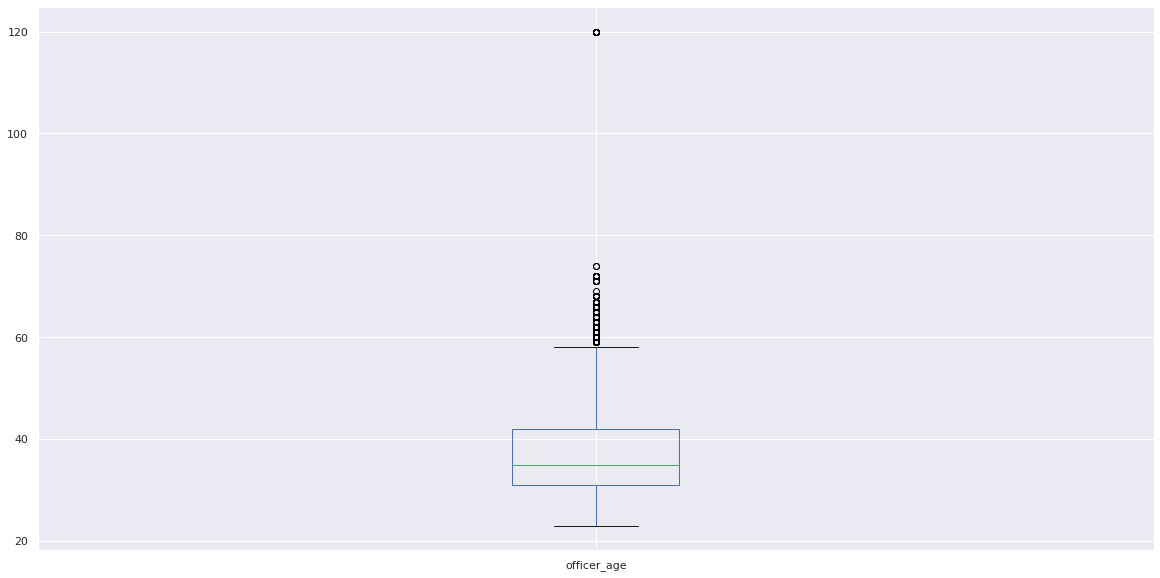

In [114]:
terry_df["officer_age"].plot.box()

In [115]:
terry_df["arrestflag"].value_counts(normalize=True) * 100

N    95.081814
Y     4.918186
Name: arrestflag, dtype: float64

In [120]:
filtered_df = terry_df[terry_df["subjectrace"] == "Unknown"]
filtered_df["arrestflag"].value_counts(normalize=True) * 100

N    93.263061
Y     6.736939
Name: arrestflag, dtype: float64

In [121]:
filtered_df2 = terry_df[terry_df["subjectrace"] == "White"]
filtered_df2["arrestflag"].value_counts(normalize=True) * 100

N    95.062554
Y     4.937446
Name: arrestflag, dtype: float64

In [122]:
filtered_df3 = terry_df[terry_df["subjectrace"] == "Black or African American"]
filtered_df3["arrestflag"].value_counts(normalize=True) * 100

N    94.577177
Y     5.422823
Name: arrestflag, dtype: float64

In [143]:
terry_df["friskflag"].value_counts(normalize=True) * 100

False    77.824862
True     22.175138
Name: friskflag, dtype: float64

In [145]:
def frisk_printer():
    set_races = set()
    for race in terry_df["subjectrace"]:
        set_races.add(race)
    
    for race in set_races:
        filtered_df = terry_df[terry_df["subjectrace"] == race]
        output = filtered_df["friskflag"].value_counts(normalize=True) * 100
        print(f"""
suspect race:{race}
frisk stats
{output}
        """)

frisk_printer()


suspect race:nan
frisk stats
Series([], Name: friskflag, dtype: float64)
        

suspect race:White
frisk stats
False    81.076648
True     18.923352
Name: friskflag, dtype: float64
        

suspect race:Multi-Racial
frisk stats
False    77.261307
True     22.738693
Name: friskflag, dtype: float64
        

suspect race:Asian
frisk stats
False    74.001507
True     25.998493
Name: friskflag, dtype: float64
        

suspect race:Native Hawaiian or Other Pacific Islander
frisk stats
False    76.470588
True     23.529412
Name: friskflag, dtype: float64
        

suspect race:Other
frisk stats
False    76.510067
True     23.489933
Name: friskflag, dtype: float64
        

suspect race:American Indian or Alaska Native
frisk stats
False    77.473854
True     22.526146
Name: friskflag, dtype: float64
        

suspect race:Hispanic
frisk stats
False    73.845231
True     26.154769
Name: friskflag, dtype: float64
        

suspect race:Black or African American
frisk stats
False    73.561